In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score, make_scorer

def classification_report_with_accuracy_score(y_true, y_pred):

    print(classification_report(y_true, y_pred)) # print classification report
    return accuracy_score(y_true, y_pred) # return accuracy score


%matplotlib inline

In [0]:
path = "/content/drive/My Drive/ML_Term_Project/"
data_df = pd.read_csv(path + "dataset_3.csv")

In [0]:
# Some useless columns are dropped
data_df = data_df.drop(["Unnamed: 0", "index"], axis=1)

In [0]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16907 entries, 0 to 16906
Data columns (total 3 columns):
text     16595 non-null object
class    16907 non-null object
norm     16907 non-null int64
dtypes: int64(1), object(2)
memory usage: 396.4+ KB


In [0]:
data_df.fillna("")

,text,class,norm
0,TIL I'm the district attorney.,none,2
1,Aw there's nothing to cry about Lynn xx,none,2
2,"Call me sexist, but shouldn't everyone on the ...",sexism,1
3,"""We fought so hard in this entire comp it woul...",none,2
4,This season is going to go on forever,none,2
...,...,...,...
16902,"ash and camilla have grown on me, but can Kat ...",sexism,1
16903,"Kat you've been owned: ""there's only one way t...",none,2
16904,"Because if non of those things are true, I don...",none,2
16905,Why not just make a tart?,none,2


In [0]:

def feature_extract(text, stop_word=True, n_gram=(1, 1)):

    # If stop words want to be excluded.
    if stop_word:
    
        tf_idf = TfidfVectorizer(ngram_range=n_gram, stop_words="english")
        tf_idf.fit_transform(text)

        X = tf_idf.transform(text)
        
    # If stop words want to be included
    if not stop_word:
    
        tf_idf = TfidfVectorizer(ngram_range=n_gram)
        tf_idf.fit_transform(text)

        X = tf_idf.transform(text)
        
    return X

In [0]:
"""
@:param range_list represents x-axis values. If your x-axis values are in (1, 20) range,
plot's x-axis's in (1, 20) range.
@:param value_list represents accuracy values
@:param title_str is your plot's title. It must be in string type. 
@:param x_label_str is your x-axis title. For example, 'C values'
@:param y_label_str is your y-axis title. For example, 'Accuracies'
"""

def draw_plot(range_list, value_list, title_str, x_label_str, y_label_str):

    plt.plot(range_list, value_list, color="b", linestyle="dashed", marker="o", markerfacecolor="r")
    plt.title(title_str)
    plt.xlabel(x_label_str)
    plt.ylabel(y_label_str)
    plt.show()

In [0]:
X = data_df['text'].values.astype('U')
X = feature_extract(X)
y = []
for label in data_df["norm"]:
    if label == 1 or label == 0:
        y.append(1)
    else:
        y.append(0)

In [0]:
c_acc_list = []
for c in range(1, 20):
    clf = LogisticRegression(C=c, solver="liblinear", multi_class="ovr", random_state=42)
    scores = cross_val_score(clf, X, y, cv=10)
    c_acc_list.append(scores.mean())
    print("Accuracy C:", c, ": ", scores.mean())

Accuracy C: 1 :  0.80712073335283
Accuracy C: 2 :  0.8135676035097411
Accuracy C: 3 :  0.814987582008945
Accuracy C: 4 :  0.8159339076661836
Accuracy C: 5 :  0.8145142089792683
Accuracy C: 6 :  0.8141590043087923
Accuracy C: 7 :  0.8138632862474886
Accuracy C: 8 :  0.8134491199732604
Accuracy C: 9 :  0.8122071462803019
Accuracy C: 10 :  0.8103737014312262
Accuracy C: 11 :  0.8099007486379233
Accuracy C: 12 :  0.8093092425311671
Accuracy C: 13 :  0.8083626717636673
Accuracy C: 14 :  0.806883976522361
Accuracy C: 15 :  0.8065882934531314
Accuracy C: 16 :  0.8062926454174116
Accuracy C: 17 :  0.8058196575905988
Accuracy C: 18 :  0.8055237995195629
Accuracy C: 19 :  0.8049324335054096


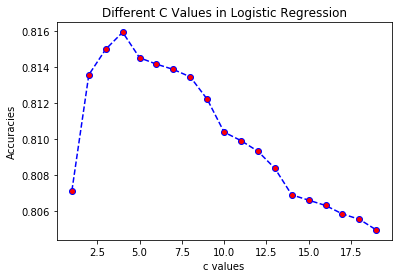

In [0]:
draw_plot(range(1, 20), c_acc_list, "Different C Values in Logistic Regression", "c values", "Accuracies")

In [0]:
c_val = max(c_acc_list)
c = c_acc_list.index(c_val)+1
print(c)

4


In [0]:
with_stop_word_acc = []
without_stop_word_acc = []
for i in range(1, 6):
    for stop_word in [True, False]:
        X = data_df['text'].values.astype('U')
        X = feature_extract(X, stop_word=stop_word, n_gram=(i, i))
        y = []
        for label in data_df["norm"]:
            if label == 1 or label == 0:
                y.append(1)
            else:
                y.append(0)
        clf = LogisticRegression(C=4, solver="liblinear", multi_class="ovr", random_state=42)
        scores = cross_val_score(clf, X, y, cv=10)
        if stop_word:
            print("Accuracy without stopwords", (i, i), ":" , scores.mean())
            without_stop_word_acc.append(scores.mean())
        else:
            print("Accuracy with stopwords", (i, i), ":" , scores.mean())
            with_stop_word_acc.append(scores.mean())

Accuracy without stopwords (1, 1) : 0.8161120306250634
Accuracy with stopwords (1, 1) : 0.8172943428313486
Accuracy without stopwords (2, 2) : 0.7376825449035793
Accuracy with stopwords (2, 2) : 0.7728161971313497
Accuracy without stopwords (3, 3) : 0.6936773870718282
Accuracy with stopwords (3, 3) : 0.7405811833619685
Accuracy without stopwords (4, 4) : 0.687999258168025
Accuracy with stopwords (4, 4) : 0.7100610261775708
Accuracy without stopwords (5, 5) : 0.6867570395305463
Accuracy with stopwords (5, 5) : 0.689832632908646


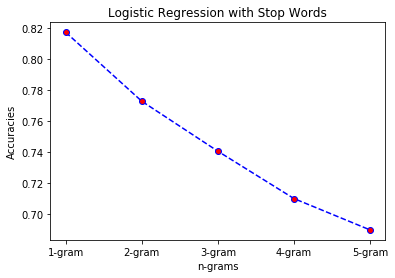

In [0]:
range_list = ["1-gram", "2-gram", "3-gram", "4-gram", "5-gram"]

draw_plot(range_list, with_stop_word_acc, "Logistic Regression with Stop Words", "n-grams", "Accuracies")

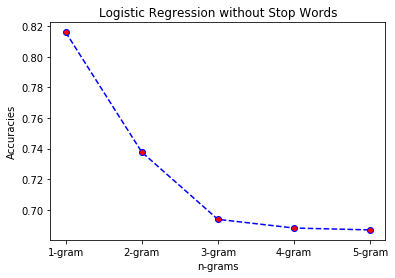

In [0]:
draw_plot(range_list, without_stop_word_acc, "Logistic Regression without Stop Words", "n-grams", "Accuracies")
